In [1]:
import os

In [2]:
# use GPU 1
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [3]:
IMAGES_DIR = '/d2/caches/kaggle-planet/processed-images-64x64'
IMAGE_SHAPE = (64, 64, 4)
TEST_TIFFS_DIR = '/datasets/kaggle/planet/test-tif-v2'
MODEL = '/d2/caches/kaggle-planet/models/B/e34-l=21.15490-vl=21.06385.h5'
BATCH_SIZE = 128

In [5]:
%run 'Lib.ipynb'

MODEL_CHECKPOINT_DIR not defined 


In [6]:
import keras

Using TensorFlow backend.


In [7]:
X_files_pred = [x.split('.')[0] for x in list_files(TEST_TIFFS_DIR)]
print(len(X_files_pred))

61191


In [8]:
# number of batches for prediction
import math
N_BATCHES = int(math.ceil(float(len(X_files_pred)) / float(BATCH_SIZE)))

In [9]:
model = keras.models.load_model(MODEL)

In [69]:
# map actual files to csv provided

test_mapping = pd.read_csv('/datasets/kaggle/planet/test_v2_file_mapping.csv')
import re

def map_file_v2(orig):
    
    if not re.match('^test_', orig) is None:
        
        base = re.findall('^test_\\d+', orig)[0]
        return (base + '.tif', base + '.jpg')
        
    else:

        fid = re.findall('\\d+', orig)[0]
        d = test_mapping[test_mapping['old'] == ('file_' + fid + '.tif')]
        if len(d) == 0: fid_new = fid
        else: fid_new = re.findall('\\d+', d['new'].values[0])[0]
        return ('file_' + fid_new + '.tif', 'test_' + fid_new + '.jpg')

In [124]:
subm = []

import re

classes = np.load('out/classes_misc.npy')
classes_weather = np.load('out/classes_weather.npy')

i = 0

for f in tqdm(X_files_pred):
    assert (os.path.isfile(IMAGES_DIR + '/' + f))

    b = generate_batch_2(
        n_samples=1,
        batch_index=i,
        X_files=X_files_pred,
        images_dir=IMAGES_DIR,
        image_shape=IMAGE_SHAPE)

    p = model.predict(b)

    tags = []

    for i, c in enumerate(classes):
        if p[i][0][0] > 0.5:
            tags.append(c)

    w = np.argmax(p[13][0])

    if w != 4: 
        tags.append(classes_weather[w])

    subm.append({'image_name': f, 'tags': ' '.join(tags)})

    i += 1

100%|██████████| 61191/61191 [02:51<00:00, 357.71it/s]


In [125]:
subm_df = pd.DataFrame(subm)

In [126]:
subm_df.to_csv('out/submission-b.csv', index=False)

In [20]:
X_files_pred = [x.split('.')[0] for x in list_files(TEST_TIFFS_DIR)]

['primary', 'clear']
test_20173 ('test_20173.tif', 'test_20173.jpg')


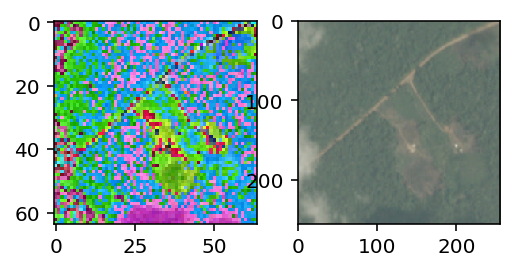

In [121]:
bi = 999

b = generate_batch_2(
    n_samples=1,
    batch_index=bi,
    X_files=X_files_pred,
    images_dir=IMAGES_DIR,
    image_shape=IMAGE_SHAPE)

p = model.predict(b)

tags = []

for i, c in enumerate(classes):
    if p[i][0][0] > 0.5:
        tags.append(c)

w = np.argmax(p[13][0])

if w != 4: 
    tags.append(classes_weather[w])
    
print(tags)

fig = plt.figure()
fig.set_size_inches(4, 2)

fig.add_subplot(1, 2, 1)
plt.imshow(b[0][:, :, :3])

fig.add_subplot(1, 2, 2)
plt.imshow(b[0][:, :, :3])
m = map_file_v2(X_files_pred[bi])
print(X_files_pred[bi], m)
plt.imshow(plt.imread('/datasets/kaggle/planet/test-jpg/' + m[1]))

In [117]:
tags = []

for i, c in enumerate(classes):
    if p[i][0][0] > 0.5:
        tags.append(c)

w = np.argmax(p[13][0])

if w != 4: 
    tags.append(classes_weather[w])
    
print(tags)

['primary', 'clear']


In [106]:
p[0][0][0]

0.0

In [112]:
p[13]

array([[ 1.,  0.,  0.,  0.,  0.]], dtype=float32)